## This notebook focuses on the performance of different optimizers for VGG19 style transfer. 

First, we just copy and paste the preprocessing code from style_transfer_vgg19.ipynb

In [1]:
!git clone https://github.com/MagicShow1999/CV-Final-Project
%cd ../

# note: the error already exists is because we run the command many times 

C:\Users\92063\Desktop\CV-Final-Project


Cloning into 'CV-Final-Project'...


In [2]:
import torch 
from torchvision import transforms , models 
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
# util file is our own file which contains preprocess functions
import util as util
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
# read image. The first experiment is using smaller content and style images with fewer pixels
style = util.read_image('./image/picasso.jpg').to(device)
content = util.read_image('./image/dancing.jpg').to(device)

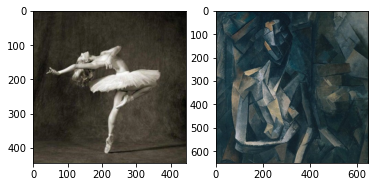

In [4]:
# show image
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(util.torchTensorToImage(content),label = "Content")
ax2.imshow(util.torchTensorToImage(style),label = "Style")
plt.show()

In [5]:

# load the model
model = models.vgg19(pretrained=True).features
# set the requires_grad to false
for param in model.parameters():
    param.requires_grad = False

model.to(device)


def activate_model(input, model):
  layers = {
    '0' : 'conv1_1',
    '5' : 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
  }
  features = {}
  x = input
  for name,layer in model._modules.items():
      x = layer(x)
      if name in layers:
          features[layers[name]] = x 
  
  return features


    
style_features = activate_model(style,model)
content_features = activate_model(content,model)

style_feature_ratio = {"conv1_1" : 1.0, 
                 "conv2_1" : 0.8,
                 "conv3_1" : 0.4,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.1}

# calculate the gram matrix of style features
style_grams = {}
for layer in style_features:
  style_grams[layer] = util.gram_matrix(style_features[layer])

output = content.clone().requires_grad_(True).to(device)

def style_transfer(opt_x, opt_y):
    for i in range(1,epochs+1):
        output_features = activate_model(output,model)
        content_loss = torch.mean((content_features['conv4_2']-output_features['conv4_2'])**2)

        style_loss = 0
        for layer in style_feature_ratio:
            style_gram = style_grams[layer]
            output_gram = output_features[layer]
            _,d,w,h = output_gram.shape
            output_gram = util.gram_matrix(output_gram)

            style_loss += (style_feature_ratio[layer]*torch.mean((output_gram-style_gram)**2))/d*w*h

        total_loss = content_wt*content_loss + style_wt*style_loss 
        if i % 100 == 0:       
            print("epoch: ",i," ", total_loss)
            opt_x.append(i)
            opt_y.append(total_loss.cpu().item())

        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()
        if i % intervention == 0:
           util.paint_image(output)

## We test Adam, SGD, Adadelta, Adagrad, RMSProp and LBFGS

The first experiment is using smaller content and style images with fewer pixels. The epochs are 3000 

In [9]:
# hyperparameters for Adam
content_wt = 100
style_wt = 1e8
lr = 0.003
intervention = 500
epochs = 3000
optimizer = torch.optim.Adam([output],lr=lr)
# x is x-coordinate which denotes epochs
# y is x-coordinate which denotes total loss

adam_x = []
adam_y = []

epoch:  100   tensor(49144.6680, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  200   tensor(6496.9199, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  300   tensor(4397.2080, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  400   tensor(3428.5796, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  500   tensor(2831.0950, device='cuda:0', grad_fn=<AddBackward0>)


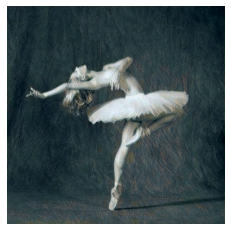

epoch:  600   tensor(2408.3970, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  700   tensor(2085.3806, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  800   tensor(1826.1219, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  900   tensor(1611.4652, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1000   tensor(1430.4818, device='cuda:0', grad_fn=<AddBackward0>)


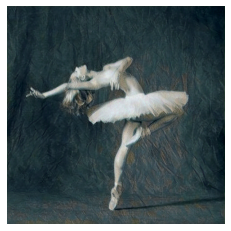

epoch:  1100   tensor(1275.5732, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1200   tensor(1141.7561, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1300   tensor(1025.3258, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1400   tensor(923.3826, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1500   tensor(833.8428, device='cuda:0', grad_fn=<AddBackward0>)


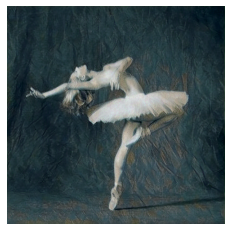

epoch:  1600   tensor(755.0536, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1700   tensor(685.4844, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1800   tensor(623.9271, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1900   tensor(569.2657, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2000   tensor(520.6663, device='cuda:0', grad_fn=<AddBackward0>)


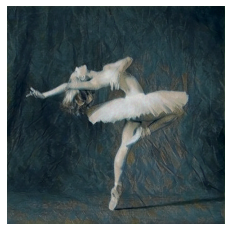

epoch:  2100   tensor(477.4357, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2200   tensor(438.8770, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2300   tensor(404.4827, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2400   tensor(373.7836, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2500   tensor(346.2912, device='cuda:0', grad_fn=<AddBackward0>)


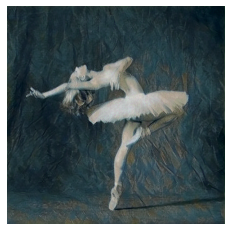

epoch:  2600   tensor(321.6175, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2700   tensor(299.4092, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2800   tensor(279.3937, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2900   tensor(261.3210, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  3000   tensor(244.9736, device='cuda:0', grad_fn=<AddBackward0>)


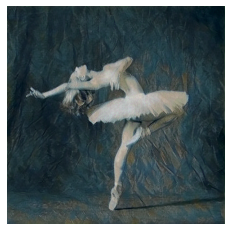

In [85]:
import time
begin_time = time.time()
style_transfer(adam_x, adam_y) 
print("Time elapsed:\t{} seconds".format(time.time()-begin_time))

In [16]:
util.save_image(output, 'output/adam_sm_lr.jpg')

Successfully save the final stylized image to: adam_sm_lr.jpg


## we adjust learning rate to be 0.1 and train it again

epoch:  100   tensor(49145.6641, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  200   tensor(6496.3062, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  300   tensor(4397.1323, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  400   tensor(3428.5359, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  500   tensor(2831.2305, device='cuda:0', grad_fn=<AddBackward0>)


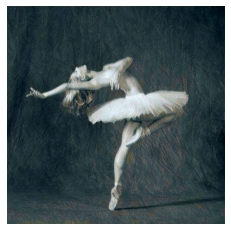

epoch:  600   tensor(2408.4607, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  700   tensor(2085.5103, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  800   tensor(1826.2886, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  900   tensor(1611.6283, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1000   tensor(1430.4554, device='cuda:0', grad_fn=<AddBackward0>)


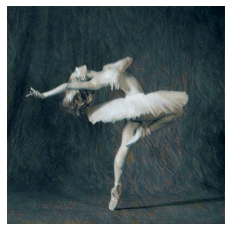

epoch:  1100   tensor(1275.4897, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1200   tensor(1141.7632, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1300   tensor(1025.3644, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1400   tensor(923.5057, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1500   tensor(834.0665, device='cuda:0', grad_fn=<AddBackward0>)


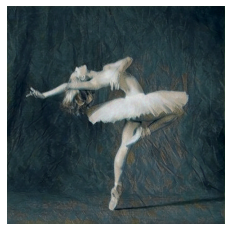

epoch:  1600   tensor(755.2797, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1700   tensor(685.6589, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1800   tensor(624.0022, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1900   tensor(569.3020, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2000   tensor(520.6730, device='cuda:0', grad_fn=<AddBackward0>)


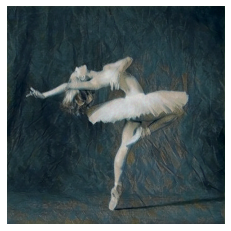

epoch:  2100   tensor(477.4335, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2200   tensor(438.8763, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2300   tensor(404.4502, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2400   tensor(373.7141, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2500   tensor(346.1778, device='cuda:0', grad_fn=<AddBackward0>)


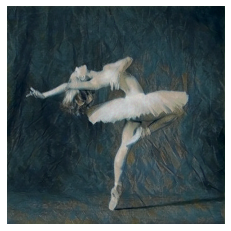

epoch:  2600   tensor(321.4447, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2700   tensor(299.2199, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2800   tensor(279.2164, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2900   tensor(261.1781, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  3000   tensor(244.8768, device='cuda:0', grad_fn=<AddBackward0>)


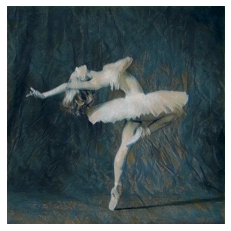

In [24]:
lr = 0.1
adam_x = []
adam_y = []
style_transfer(adam_x, adam_y) 

In [26]:
util.save_image(output, 'output/adam_hi_lr.jpg')

Successfully save the final stylized image to: output/adam_hi_lr.jpg


The learning rate doesn't seem to quite affect Adam when the picture size is small.

## Now let's try SGD


In [29]:
# hyperparameters for SGD
content_wt = 100
style_wt = 1e8
lr = 0.003
intervention = 500
epochs = 3000
optimizer = torch.optim.SGD([output],lr=lr)
# x is x-coordinate which denotes epochs
# y is x-coordinate which denotes total loss
SGD_x = []
SGD_y = []

epoch:  100   tensor(4745.6343, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  200   tensor(3024.7219, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  300   tensor(2381.7239, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  400   tensor(1982.1381, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  500   tensor(1695.5989, device='cuda:0', grad_fn=<AddBackward0>)


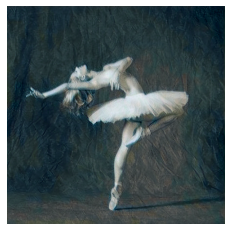

epoch:  600   tensor(1487.0461, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  700   tensor(1312.7734, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  800   tensor(1172.5870, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  900   tensor(1057.2808, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1000   tensor(959.7439, device='cuda:0', grad_fn=<AddBackward0>)


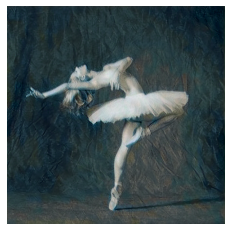

epoch:  1100   tensor(878.7364, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1200   tensor(808.8604, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1300   tensor(746.7582, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1400   tensor(694.6274, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1500   tensor(650.8010, device='cuda:0', grad_fn=<AddBackward0>)


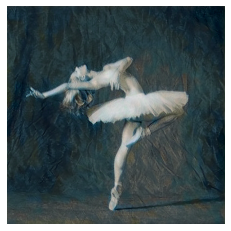

epoch:  1600   tensor(607.6888, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1700   tensor(571.8892, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1800   tensor(546.3350, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1900   tensor(511.5721, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2000   tensor(486.0583, device='cuda:0', grad_fn=<AddBackward0>)


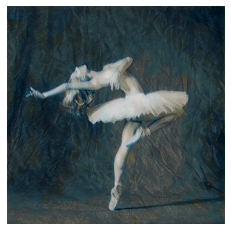

epoch:  2100   tensor(463.0065, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2200   tensor(442.4117, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2300   tensor(424.7350, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2400   tensor(405.8434, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2500   tensor(389.8651, device='cuda:0', grad_fn=<AddBackward0>)


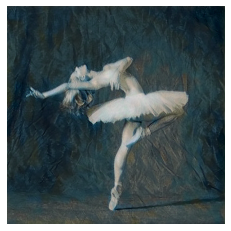

epoch:  2600   tensor(375.5435, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2700   tensor(365.7304, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2800   tensor(349.5363, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2900   tensor(337.9827, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  3000   tensor(328.4603, device='cuda:0', grad_fn=<AddBackward0>)


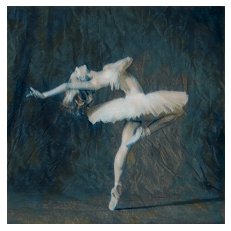

In [30]:
style_transfer(SGD_x, SGD_y)

In [31]:
util.save_image(output, 'output/sgd_lo_lr.jpg')

Successfully save the final stylized image to: output/sgd_lo_lr.jpg


epoch:  100   tensor(49144.3242, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  200   tensor(6497.4126, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  300   tensor(4397.6406, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  400   tensor(3428.5444, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  500   tensor(2830.9998, device='cuda:0', grad_fn=<AddBackward0>)


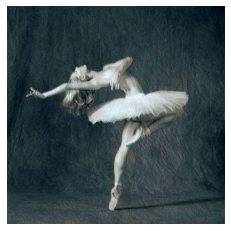

epoch:  600   tensor(2408.4417, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  700   tensor(2085.2244, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  800   tensor(1825.9114, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  900   tensor(1611.2004, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1000   tensor(1430.2546, device='cuda:0', grad_fn=<AddBackward0>)


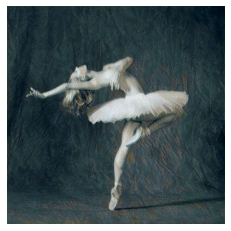

epoch:  1100   tensor(1275.4048, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1200   tensor(1141.6909, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1300   tensor(1025.3158, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1400   tensor(923.4247, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1500   tensor(833.9832, device='cuda:0', grad_fn=<AddBackward0>)


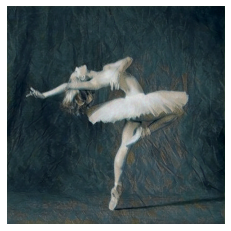

epoch:  1600   tensor(755.2380, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1700   tensor(685.6462, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1800   tensor(624.0335, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1900   tensor(569.3409, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2000   tensor(520.7429, device='cuda:0', grad_fn=<AddBackward0>)


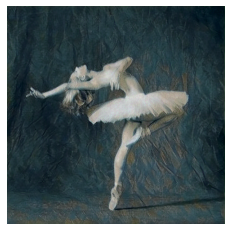

epoch:  2100   tensor(477.4995, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2200   tensor(438.9343, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2300   tensor(404.5342, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2400   tensor(373.7843, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2500   tensor(346.2337, device='cuda:0', grad_fn=<AddBackward0>)


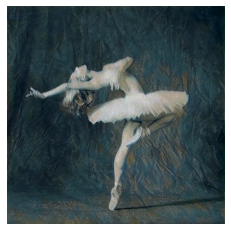

epoch:  2600   tensor(321.5022, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2700   tensor(299.2693, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2800   tensor(279.2409, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2900   tensor(261.1791, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  3000   tensor(244.8776, device='cuda:0', grad_fn=<AddBackward0>)


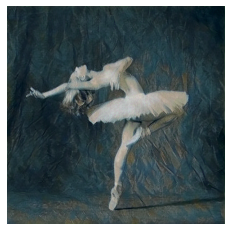

In [34]:
# try learning rate to be 1
lr = 1
SGD_hilr_x = []
SGD_hilr_y = []
style_transfer(SGD_hilr_x,SGD_hilr_y)

In [35]:
util.save_image(output, 'output/sgd_hi_lr.jpg')

Successfully save the final stylized image to: output/sgd_hi_lr.jpg


In SGD, the output images only have slight difference in that the high learning rate one has wider colo range(more yellow on the body) and the texture has appeared.

## Now let's try Adadelta

In [38]:
lr = 0.1
optimizer = torch.optim.Adadelta([output],lr=lr)
adadelta_x = []
adadelta_y = []

epoch:  100   tensor(531062., device='cuda:0', grad_fn=<AddBackward0>)
epoch:  200   tensor(316781.5938, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  300   tensor(156450.8750, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  400   tensor(63209.5742, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  500   tensor(21538.8203, device='cuda:0', grad_fn=<AddBackward0>)


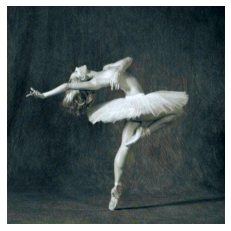

epoch:  600   tensor(8211.9629, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  700   tensor(4622.4922, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  800   tensor(3280.7705, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  900   tensor(2612.3591, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1000   tensor(2198.2258, device='cuda:0', grad_fn=<AddBackward0>)


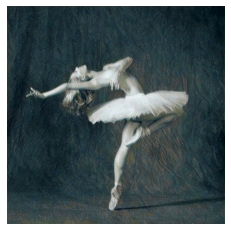

epoch:  1100   tensor(1904.9697, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1200   tensor(1679.7697, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1300   tensor(1501.1826, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1400   tensor(1354.4438, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1500   tensor(1232.3729, device='cuda:0', grad_fn=<AddBackward0>)


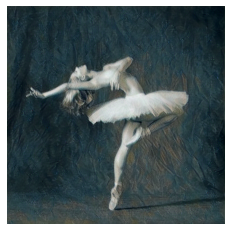

epoch:  1600   tensor(1127.7692, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1700   tensor(1038.6143, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1800   tensor(959.9199, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1900   tensor(891.3630, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2000   tensor(830.0456, device='cuda:0', grad_fn=<AddBackward0>)


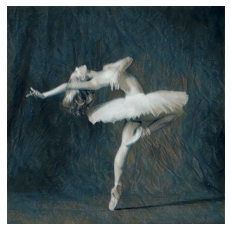

epoch:  2100   tensor(775.7227, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2200   tensor(725.9743, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2300   tensor(682.0594, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2400   tensor(641.7416, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2500   tensor(605.5397, device='cuda:0', grad_fn=<AddBackward0>)


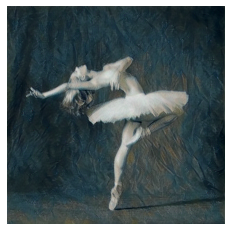

epoch:  2600   tensor(572.0858, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2700   tensor(541.9706, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2800   tensor(514.1974, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2900   tensor(489.0971, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  3000   tensor(465.7704, device='cuda:0', grad_fn=<AddBackward0>)


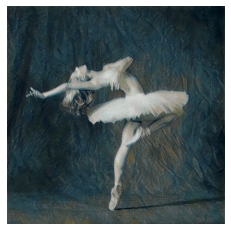

In [39]:
style_transfer(adadelta_x, adadelta_y)

In [40]:
util.save_image(output, 'output/adadelta.jpg')

Successfully save the final stylized image to: output/adadelta.jpg


## Now let's try the adagrad

In [43]:
lr = 0.1
optimizer = torch.optim.Adagrad([output],lr=lr)

adagrad_x = []
adagrad_y = []

epoch:  100   tensor(3343.8667, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  200   tensor(2259.2417, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  300   tensor(1767.3395, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  400   tensor(1457.8856, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  500   tensor(1237.3506, device='cuda:0', grad_fn=<AddBackward0>)


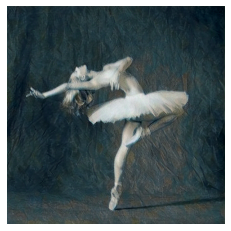

epoch:  600   tensor(1072.9541, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  700   tensor(946.5648, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  800   tensor(842.9604, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  900   tensor(761.1832, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1000   tensor(695.7314, device='cuda:0', grad_fn=<AddBackward0>)


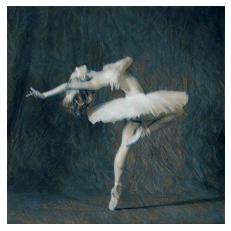

epoch:  1100   tensor(642.9133, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1200   tensor(591.4851, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1300   tensor(549.1504, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1400   tensor(514.1151, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1500   tensor(480.3026, device='cuda:0', grad_fn=<AddBackward0>)


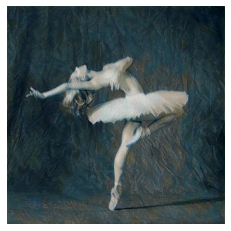

epoch:  1600   tensor(455.4008, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1700   tensor(429.0822, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1800   tensor(408.1281, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1900   tensor(387.4354, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2000   tensor(370.8592, device='cuda:0', grad_fn=<AddBackward0>)


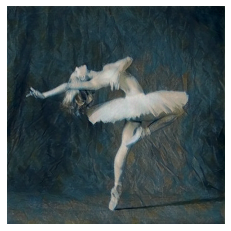

epoch:  2100   tensor(354.4473, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2200   tensor(341.2461, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2300   tensor(325.7645, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2400   tensor(316.0524, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2500   tensor(303.0724, device='cuda:0', grad_fn=<AddBackward0>)


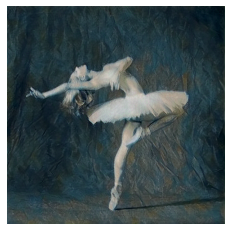

epoch:  2600   tensor(292.6676, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2700   tensor(284.5478, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2800   tensor(274.0987, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  2900   tensor(266.4324, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  3000   tensor(259.7460, device='cuda:0', grad_fn=<AddBackward0>)


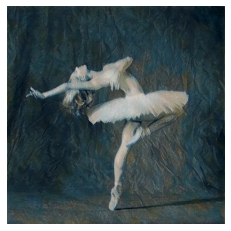

In [44]:
style_transfer(adagrad_x, adagrad_y)

In [45]:
util.save_image(output, 'output/adagrad.jpg')

Successfully save the final stylized image to: adagrad.jpg


## Last, we will try the LBFGS, which is used by most neural transfer implementations

In [10]:
optimizer = torch.optim.LBFGS([output])
LBFGS_x = []
LBFGS_y = []
intervention = 500
epochs = 1500

In [11]:
# need to redefine the training function to adjust LBFGS
iter = [1]
def style_transfer_LBFGS():
  while iter[0] <= epochs:
    def closure():
        optimizer.zero_grad()
        
        output_features = activate_model(output,model)
        content_loss = torch.mean((content_features['conv4_2']-output_features['conv4_2'])**2)

        style_loss = 0
        for layer in style_feature_ratio:
            style_gram = style_grams[layer]
            output_gram = output_features[layer]
            _,d,w,h = output_gram.shape
            output_gram = util.gram_matrix(output_gram)

            style_loss += (style_feature_ratio[layer]*torch.mean((output_gram-style_gram)**2))/d*w*h

        total_loss = content_wt*content_loss + style_wt*style_loss 
        if iter[0] % 100 == 0:       
            print("epoch: ",iter[0]," ", total_loss)
            LBFGS_x.append(iter[0])
            LBFGS_y.append(total_loss.cpu().item())
        total_loss.backward()
        if iter[0] % intervention == 0:
            util.paint_image(output)
        iter[0] += 1
        return total_loss
    optimizer.step(closure)
    

epoch:  100   tensor(260.9883, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  200   tensor(96.8454, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  300   tensor(74.4410, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  400   tensor(66.1250, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  500   tensor(61.5838, device='cuda:0', grad_fn=<AddBackward0>)


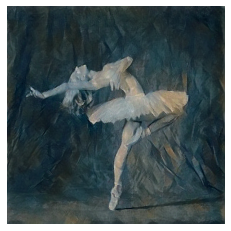

epoch:  600   tensor(58.8164, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  700   tensor(56.8985, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  800   tensor(55.4841, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  900   tensor(54.4269, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1000   tensor(53.6039, device='cuda:0', grad_fn=<AddBackward0>)


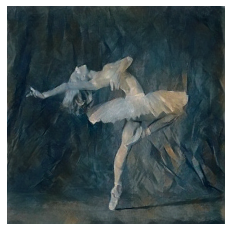

epoch:  1100   tensor(52.9460, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1200   tensor(52.4152, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1300   tensor(51.9822, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1400   tensor(51.5977, device='cuda:0', grad_fn=<AddBackward0>)
epoch:  1500   tensor(51.2758, device='cuda:0', grad_fn=<AddBackward0>)


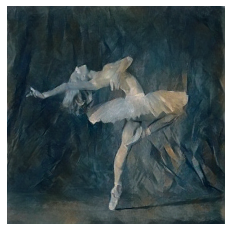

Time elapsed:	61.67856431007385 seconds


In [12]:
import time
begin_time = time.time()
style_transfer_LBFGS()
print("Time elapsed:\t{} seconds".format(time.time()-begin_time))


In [72]:
util.save_image(output, 'output/LBFGS.jpg')

Successfully save the final stylized image to: output/LBFGS.jpg


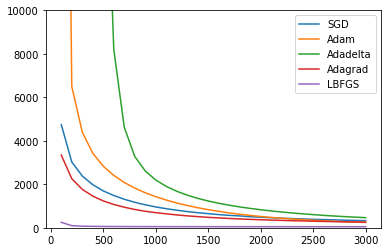

In [89]:
# draw a graph to show the optimizers different total loss
ax = plt.gca()
ax.set_ylim([0, 10000])

fig = plt.gcf()
plt.plot(SGD_x, SGD_y, label='SGD')
plt.plot(adam_x, adam_y, label='Adam')
plt.plot(adadelta_x, adadelta_y, label='Adadelta')
plt.plot(adagrad_x, adagrad_y, label='Adagrad')

plt.plot(LBFGS_x, LBFGS_y, label='LBFGS')
plt.legend()
plt.show()

fig.savefig("opt_comparison.png")